# Multiple Qubit Gates

In [2]:
# First we are going to import the libraries needed 
from qiskit import *
from numpy import *
from qiskit.visualization import plot_bloch_multivector, plot_histogram, array_to_latex
sim = Aer.get_backend('aer_simulator')

### Recap
Let's first review the single-qubit gates. In general, the single-qubit gates can be generalized into the Pauli gate, the Hadamard gates, phase shift gates, and the Unitary gate. 

We will revisit the Pauli gates first. 

In [3]:
# we are applying each of the three Pauli gates to the 3 qubits
# Remember that a qubit starts at the |0> state
cq1 = QuantumCircuit(3)
cq1.x(0)
cq1.y(1)
cq1.z(2)
cq1.draw()

┌───┐
q_0: ┤ X ├
     ├───┤
q_1: ┤ Y ├
     ├───┤
q_2: ┤ Z ├
     └───┘

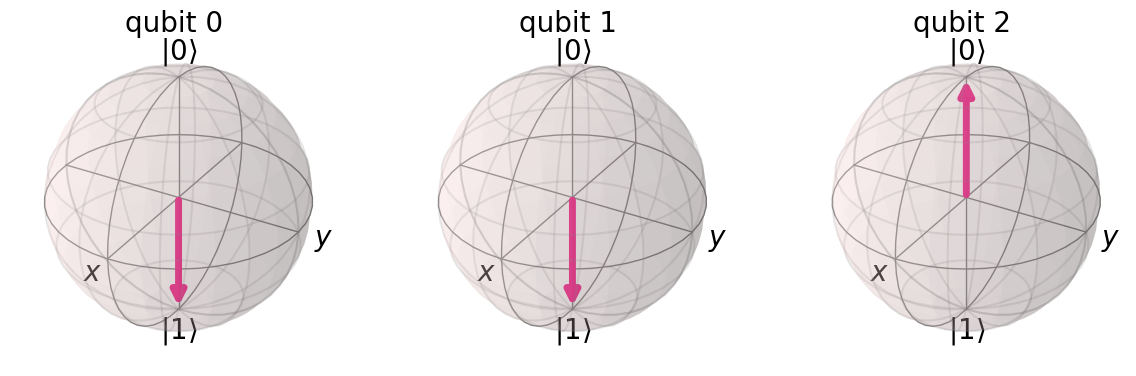

In [4]:
# the effects of all three gates can be visualized below
cq1.save_statevector()
obj1 = assemble(cq1)
state1 = sim.run(obj1).result().get_statevector()
plot_bloch_multivector(state1)

Next, we will visit the most important Hadamard Gate

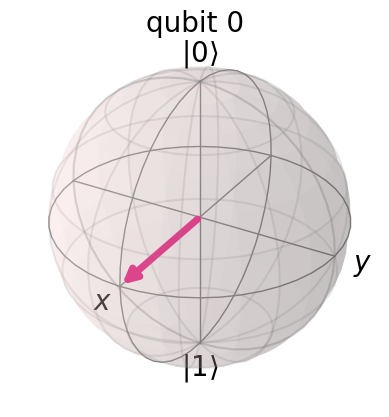

In [5]:
cq2 = QuantumCircuit(1)
cq2.h(0)
cq2.save_statevector()
obj2 = assemble(cq2)
state2 = sim.run(obj2).result().get_statevector()
plot_bloch_multivector(state2)

The most important thing, and is part of every quantum algorithm, is to initialize the starting states using the single-qubit gates.

We have shown how we can get to the $|1\rangle$ and $|0\rangle$ using the Pauli gates, and applying the Hadamard on a qubit once gives you the $|+\rangle$ state. How would you get to the $|-\rangle$ state? 

The $|-\rangle$ state is reached by applying the H gate to $|1\rangle$. 

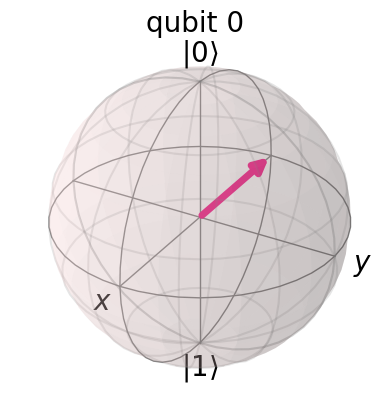

In [6]:
cq3 = QuantumCircuit(1)
cq3.x(0)
cq3.h(0)
cq3.save_statevector()
obj3 = assemble(cq3)
state3 = sim.run(obj3).result().get_statevector()
plot_bloch_multivector(state3)

Lastly, we will briefly cover the Phase gates. Keep in mind that the p gate is a generalized phase gate which takes in a parameter $\phi$ which specifies the rotation aroudn the Z-axis. Note that Z, T, S gates are all just a special case of the P gate. 

### Multi-qubit Gates

Now let's get started with the multi-qubit gates! As the logic starts to get more complicated, IBM has a [tool](https://quantum-computing.ibm.com/composer/files/new) to help you build your circuit and understand the outcome better. 

### CNOT Gate
The most common two-qubit gate is the Controlled Pauli-X Gate, as known as the CNOT gate. CNOT gate involves two qubits, one is the called the control qubit and other being the target qubit. Without looking at vector and matrix multiplication, what a CNOT gate does is that it looks at the control qubit, if it is in the $|1\rangle$ state, it will go ahead and flip the state of the target qubit.

In equations, (Using IBM's notation, you read the qubits from right to left):

$|00\rangle \rightarrow |00\rangle$;
$|10\rangle \rightarrow |10\rangle$;
$|01\rangle \rightarrow |11\rangle$;
$|11\rangle \rightarrow |01\rangle$.

We can also see this using Qiskit: 

In [7]:
# First before we apply a CNOT gate
cq4 = QuantumCircuit(2)
cq4.save_statevector()
obj4 = assemble(cq4)
state4 = sim.run(obj4).result().get_statevector()
display(array_to_latex(state4, prefix="\\text{Statevector} = "))

<IPython.core.display.Latex object>

Here, we want to introduce you a little bit of linear algebra. The statevector above has 4 entries, and each entry is the complex coefficient $\alpha$ for each of the 4 states that a 2 qubit system can be in. 

For $\alpha_{00}|00\rangle + \alpha_{01}|01\rangle + \alpha_{10}|10\rangle + \alpha_{11}|11\rangle$

$$\begin{bmatrix} \alpha_{00} \\ \alpha_{01} \\ \alpha_{10} \\ \alpha{11}\end{bmatrix}$$

In [8]:
# Now we can now apply the CNOT gate to the two qubits
cq5 = QuantumCircuit(2)
# We first initialize the control qubit to be 1 so we will see the changes 
cq5.x(0)
cq5.cx(0,1)
cq5.draw()

┌───┐     
q_0: ┤ X ├──■──
     └───┘┌─┴─┐
q_1: ─────┤ X ├
          └───┘

In [9]:
cq5.save_statevector()
obj5 = assemble(cq5)
state5 = sim.run(obj5).result().get_statevector()
display(array_to_latex(state5, prefix="\\text{Statevector} = "))

<IPython.core.display.Latex object>

What makes this gate useful is the fact that it is able to entangle qubits as well as disentangling them.

### Creating Entangled States

The matrix representation for the CNOT gate is as follows, 

\begin{bmatrix} 1 & 0 & 0 & 0 \\ 0 & 0 & 0 & 1 \\ 0 & 0 & 1 & 0 \\ 0 & 1 & 0 & 0 \end{bmatrix}

When we put a single-qubit Hadamard gate before a CNOT gate, we can observe something rather intersting happening. 

In [10]:
cq6 = QuantumCircuit(2)
cq6.h(0)
# Applying the CNOT gate
cq6.cx(0,1)
cq6.draw()


┌───┐     
q_0: ┤ H ├──■──
     └───┘┌─┴─┐
q_1: ─────┤ X ├
          └───┘

In [11]:
cq6.save_statevector()
qobj6 = assemble(cq6)
state6 = sim.run(qobj6).result().get_statevector()
display(array_to_latex(state6, prefix="\\text{Statevector} = "))

<IPython.core.display.Latex object>

We can see that there are only possibilities for two different states $|00\rangle$ and $|11\rangle$. Now we have the state $$\cfrac{1}{\sqrt(2)}(|00\rangle+|11\rangle)$$

This is what we called a Bell state, and the two qubits are entangled. And just like the single qubit, when you take a measurement, it will collapse the superposition and measure either $|00\rangle$ or $|11\rangle$. 

And most importantly, when you are measuring only one of the qubits, it will collapse the superposition, and without actually measuring the second qubit, we know for certain what state the second qubit will be. And this is what Einstein called "spooky action at a distance".

### Controlled-Z Gate
Similar to the CNOT Gate where a control qubit and a target qubit is involved. The Controlled-Z gate also applies operations on the target qubit under the same condition. We can also use some identities to transform the CNOT gate into a Controlled-Z gate. And to do this, we will use the same identities that we discussed for the single-qubit gates. 
$$Z = HXH$$
$$X = HZH$$

If we surround the CNOT gate with two Hadamard gate on the target qubit, we will achieve the Controlled-Z gate. 

In [15]:
cq7 = QuantumCircuit(2)
cq7.x(0)
#cq7.cz(1,0)
cq7.h(1)
cq7.cx(0,1)
cq7.h(1)
cq7.draw()

┌───┐          
q_0: ┤ X ├──■───────
     ├───┤┌─┴─┐┌───┐
q_1: ┤ H ├┤ X ├┤ H ├
     └───┘└───┘└───┘

In [16]:
cq7.save_statevector()
qobj7 = assemble(cq7)
state7 = sim.run(qobj7).result().get_statevector()
display(array_to_latex(state7, prefix="\\text{Statevector} = "))

<IPython.core.display.Latex object>

Note that the Controlled-Z gate is symmetrical, meaning the target and control qubits can be interchanged. 

### Swap Gate

The last multi-qubit gates that we will cover today is going to be the swap gate. Hence the name, it swaps the states of the two input qubits. 

$$|a,b\rangle \rightarrow |b,a\rangle$$

In [20]:
cq8 = QuantumCircuit(2)
# we want show how we can swap the two 
# the first qubit will be prepared to be in the + state while the second qubit will be in the - state
cq8.h(0)
cq8.x(1)
cq8.h(1)
cq8.swap(0,1)
cq8.draw()
#cq8.save_statevector()
#qobj8 = assemble(cq8)
#state8 = sim.run(qobj8).result().get_statevector()
#display(array_to_latex(state8, prefix="\\text{Statevector} = "))

┌───┐        
q_0: ┤ H ├──────X─
     ├───┤┌───┐ │ 
q_1: ┤ X ├┤ H ├─X─
     └───┘└───┘

When we first prepare the two qubits, $|-+\rangle$ the state vector will look like the following

$$state vector = \begin{bmatrix} \cfrac{1}{2} \\ \cfrac{1}{2} \\ -\cfrac{1}{2} \\ -\cfrac{1}{2}\end{bmatrix}$$

After the swap gate is applied, the state vector becomes what we have above. 